In [90]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns
from ram.utils.time_funcs import convert_date_array

In [111]:
print(RunManager.get_run_names('StatArbStrategy2'))

         Run     RunDate Completed                           Description  \
0   run_0001  2018-01-08     False                    Momentum reversion   
1   run_0002  2018-01-08     False                 Returns instead of PL   
2   run_0003  2018-01-08      True                               Bug fix   
3   run_0004  2018-01-08      True                           Market Rets   
4   run_0005  2018-01-08      True                             Sector 25   
5   run_0006  2018-01-08      True                             Sector 45   
6   run_0007  2018-01-09      True                Sector 20, more params   
7   run_0008  2018-01-09      True                Sector 25, more params   
8   run_0009  2018-01-09      True  Sector 20, different holding periods   
9   run_0010  2018-01-09      True                Sector 20, trade daily   
10  run_0013  2018-01-10     False                  FIRST RUN: Sector 10   
11  run_0014  2018-01-10     False                  FIRST RUN: Sector 20   

   Starred 

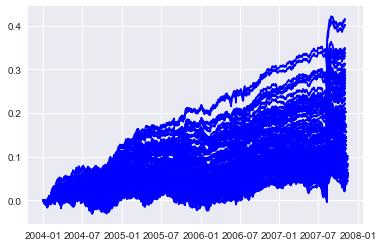

In [116]:
run1 = RunManager('StatArbStrategy2', 'run_0014', test_periods=0)
run1.import_return_frame()

plt.figure()
plt.plot(run1.returns.cumsum(), 'b')
plt.show()

In [117]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,daily_drop,False,72,0.106630,0.044197,-999.0
1,daily_drop,True,72,0.159142,0.076049,-999.0
2,data1,1,144,0.132886,0.060123,-999.0
3,holding_period,10,48,0.062379,0.041026,-999.0
4,holding_period,2,48,0.228507,0.086215,-999.0
5,holding_period,5,48,0.107772,0.053128,-999.0
6,month_end_close,False,72,0.139583,0.062011,-999.0
7,month_end_close,True,72,0.126189,0.058234,-999.0
8,prma_x,10,36,0.130578,0.058921,-999.0
9,prma_x,15,36,0.115140,0.051184,-999.0


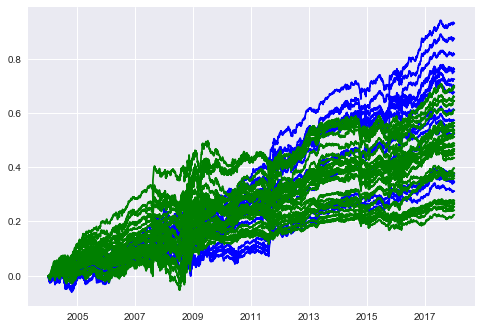

In [89]:
run1 = RunManager('StatArbStrategy2', 'run_0007', test_periods=0)
run1.import_return_frame()

drop_params = [('holding_period', 10)]
run2 = RunManager('StatArbStrategy2', 'run_0010', test_periods=0, drop_params=drop_params)
run2.import_return_frame()

plt.figure()
plt.plot(run1.returns.cumsum(), 'b')
plt.plot(run2.returns.cumsum(), 'g')
plt.show()

In [68]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,daily_drop,False,24,0.617680,0.052072,-999.0
1,daily_drop,True,24,0.530935,0.045122,-999.0
2,data1,1,48,0.574308,0.048597,-999.0
3,holding_period,10,16,0.562167,0.050711,-999.0
4,holding_period,2,16,0.544094,0.044110,-999.0
5,holding_period,5,16,0.616662,0.050971,-999.0
6,prma_x,10,12,0.550784,0.047038,-999.0
7,prma_x,15,12,0.592838,0.049752,-999.0
8,prma_x,20,12,0.634119,0.053254,-999.0
9,prma_x,5,12,0.519490,0.044343,-999.0


In [69]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,daily_drop,False,16,0.482150,0.044551,-999.0
1,daily_drop,True,16,0.406207,0.043567,-999.0
2,data1,1,32,0.444178,0.044059,-999.0
3,holding_period,2,16,0.480816,0.042615,-999.0
4,holding_period,5,16,0.407541,0.045502,-999.0
5,prma_x,10,8,0.433903,0.043285,-999.0
6,prma_x,15,8,0.472095,0.045109,-999.0
7,prma_x,20,8,0.482354,0.045932,-999.0
8,prma_x,5,8,0.388361,0.041909,-999.0
9,split_perc,20,16,0.551341,0.044901,-999.0


In [118]:
comb = CombinationSearch()

runs = ['run_0014']

for run in runs:
    run01 = RunManager('StatArbStrategy2', run)

    comb.add_run(run01)


In [119]:
comb.start(10, 'mean')

  0%|          | 0/1 [00:00<?, ?it/s]

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [00:31<00:00,  2.73s/it]


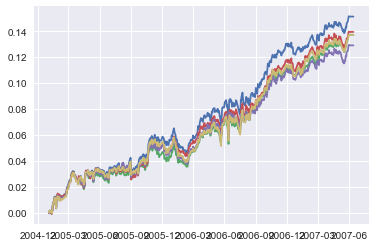

In [120]:
plt.figure()
plt.plot(comb.best_results_rets.dropna().cumsum())
plt.show()

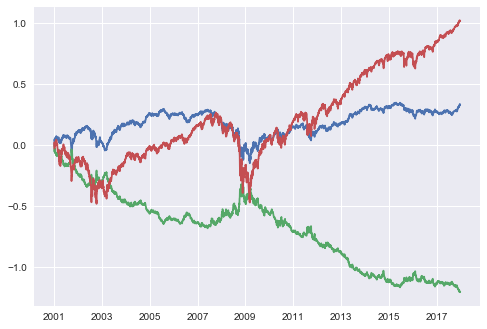

In [83]:
run1 = RunManager('StatArbStrategy2', 'run_0005', test_periods=0)
run1.import_return_frame()

plt.figure()
plt.plot(run1.returns.cumsum())
plt.show()

In [84]:
x = run1.returns
x['Ret1'] = (x.iloc[:, 0 ] + x.iloc[:, 1]) * -1

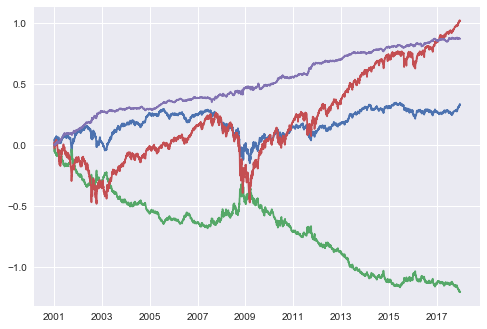

In [85]:
plt.figure()
plt.plot(x.cumsum())
plt.show()